In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt

#01. Create Line : $y$ =  $\theta$$_0$$x$ + $\theta$$_1$  

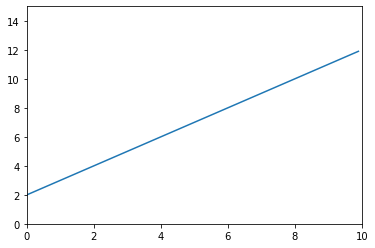

In [36]:
#if theta 0 = 1 and theta 1 = 2
def hypothesis(t1, t2, x):
  return t1 * x + t2
#array는 사용하지 않아요
x = np.arange(0, 10, 0.1)
y = hypothesis(1, 2, x)

plt.plot(x, y)
plt.axis([0,10,0,15])
plt.show()

#02. Create plots (Using Gausian Random)

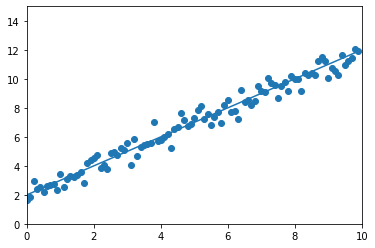

In [42]:
#정규분포를 변경한 과정도 github에 추가하자

#2-1. 가우시안 분포도 : 분포도 체크
def create_Rand(x1, y):
  return y + np.random.normal(0, 0.5, y.size)

y_2 = create_Rand(x, y)

plt.plot(x, y)
plt.scatter(x, y_2)
plt.axis([0,10,0,15])
plt.show()
